## Algorytm Genetyczny

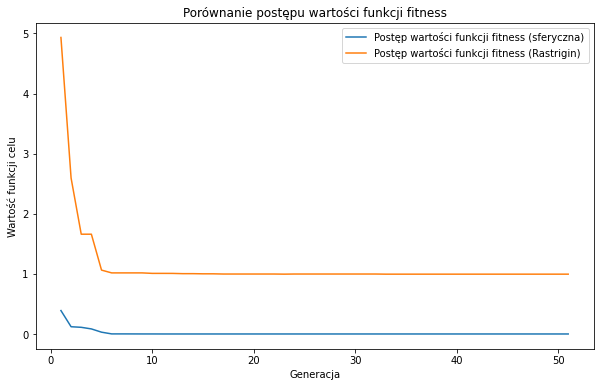

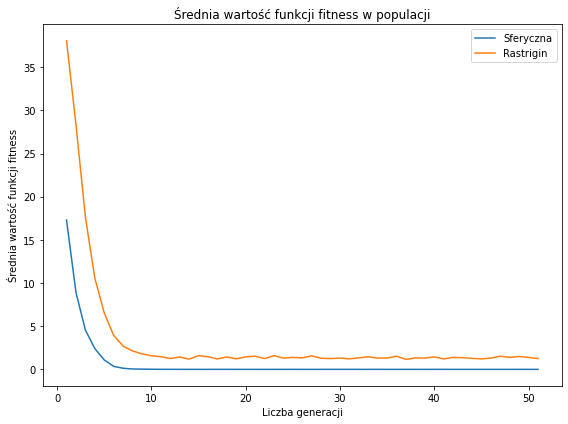

<Figure size 576x432 with 0 Axes>

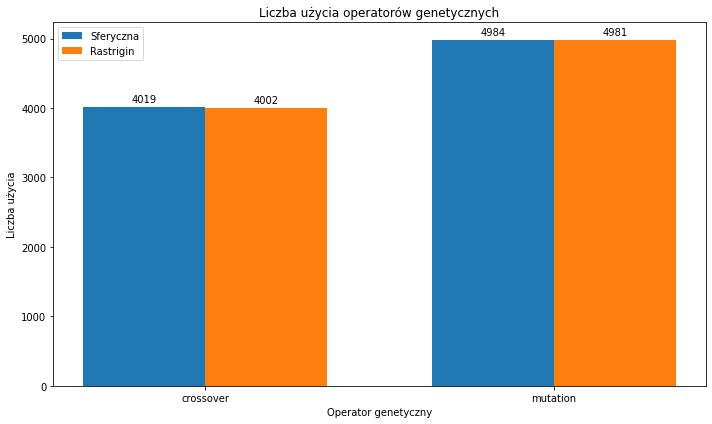

In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt

def sphere(chromosome):
    return np.sum(np.square(chromosome))

def rastrigin(chromosome):
    A = 10
    n = len(chromosome)
    chromosome = np.array(chromosome)
    return A * n + np.sum(np.square(chromosome) - A * np.cos(2 * np.pi * chromosome))

class Individual:
    def __init__(self, dimensions, min_value, max_value):
        self.dimensions = dimensions
        self.min_value = min_value
        self.max_value = max_value
        self.chromosome = self.generate_chromosome()
        self.fitness = None

    def generate_chromosome(self):
        return [random.uniform(self.min_value, self.max_value) for _ in range(self.dimensions)]

    def evaluate_fitness(self, fitness_func):
        self.fitness = fitness_func(self.chromosome)

def tournament_selection(population, tournament_size):
    participants = random.sample(population, tournament_size)
    return min(participants, key=lambda individual: individual.fitness)

def uniform_crossover(parent1, parent2, crossover_rate):
    if random.random() < crossover_rate:
        child = Individual(parent1.dimensions, parent1.min_value, parent1.max_value)
        child.chromosome = [parent1.chromosome[i] if random.random() < 0.5 else parent2.chromosome[i]
                            for i in range(parent1.dimensions)]
        return child
    else:
        return parent1

def gaussian_mutation(individual, mutation_rate, mutation_scale):
    for i in range(individual.dimensions):
        if random.random() < mutation_rate:
            individual.chromosome[i] = individual.chromosome[i] + random.gauss(0, mutation_scale)
            individual.chromosome[i] = max(individual.min_value, min(individual.chromosome[i], individual.max_value))

def genetic_algorithm(population_size, dimensions, min_value, max_value, fitness_func, tournament_size, crossover_rate,
                      mutation_rate, mutation_scale, num_generations):
    population = [Individual(dimensions, min_value, max_value) for _ in range(population_size)]
    operator_counts = {'crossover': 0, 'mutation': 0}

    for individual in population:
        individual.evaluate_fitness(fitness_func)

    best_solution = min(population, key=lambda individual: individual.fitness)
    fitness_progress = [best_solution.fitness]
    average_fitness_progress = [sum([individual.fitness for individual in population]) / population_size]  # Średnia wartość funkcji fitness w populacji

    for generation in range(num_generations):
        new_population = []
        crossover_count = 0
        mutation_count = 0

        while len(new_population) < population_size:
            parent1 = tournament_selection(population, tournament_size)
            parent2 = tournament_selection(population, tournament_size)
            offspring = uniform_crossover(parent1, parent2, crossover_rate)
            gaussian_mutation(offspring, mutation_rate, mutation_scale)
            offspring.evaluate_fitness(fitness_func)
            new_population.append(offspring)

            if offspring != parent1:
                crossover_count += 1
            if offspring != parent2:
                mutation_count += 1

        population = new_population

        operator_counts['crossover'] += crossover_count
        operator_counts['mutation'] += mutation_count

        best_solution = min(population + [best_solution], key=lambda individual: individual.fitness)
        fitness_progress.append(best_solution.fitness)

        average_fitness = sum([individual.fitness for individual in population]) / population_size
        average_fitness_progress.append(average_fitness)

        # print(f"Generation {generation + 1}: Best Fitness = {best_solution.fitness}")

    return best_solution, fitness_progress, operator_counts, average_fitness_progress

def plot_operator_counts(operator_counts_sphere, operator_counts_rastrigin):
    operators = list(operator_counts_sphere.keys())
    counts_sphere = list(operator_counts_sphere.values())
    counts_rastrigin = list(operator_counts_rastrigin.values())

    width = 0.35  # szerokość słupków
    x = np.arange(len(operators))

    plt.figure(figsize=(8, 6))  # Powiększenie figury

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, counts_sphere, width, label='Sferyczna')
    rects2 = ax.bar(x + width/2, counts_rastrigin, width, label='Rastrigin')

    ax.set_xlabel('Operator genetyczny')
    ax.set_ylabel('Liczba użycia')
    ax.set_title('Liczba użycia operatorów genetycznych')
    ax.set_xticks(x)
    ax.set_xticklabels(operators)

    # Dodanie etykiet do słupków
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # przesunięcie etykiety
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    ax.legend()

    fig.tight_layout()
    plt.show()

def plot_fitness_progress(fitness_progress_sphere, fitness_progress_rastrigin):
    generations_sphere = range(1, len(fitness_progress_sphere) + 1)
    generations_rastrigin = range(1, len(fitness_progress_rastrigin) + 1)
    
    if fitness_progress_sphere:
        plt.plot(generations_sphere, fitness_progress_sphere, label='Postęp wartości funkcji fitness (sferyczna)')
    
    if fitness_progress_rastrigin:
        plt.plot(generations_rastrigin, fitness_progress_rastrigin, label='Postęp wartości funkcji fitness (Rastrigin)')
    
    plt.xlabel('Generacja')
    plt.ylabel('Wartość funkcji celu')
    plt.title('Porównanie postępu wartości funkcji fitness')
    plt.legend()
    plt.show()


def plot_best_solution_sphere(best_solution_sphere):
    plt.plot(best_solution_sphere.chromosome[0], best_solution_sphere.chromosome[1], 'ro')
    plt.xlabel('Wymiar 1')
    plt.ylabel('Wymiar 2')
    plt.title('Najlepsze rozwiązanie dla funkcji sferycznej')
    plt.show()


def plot_best_solution_rastrigin(best_solution_rastrigin):
    plt.plot(best_solution_rastrigin.chromosome[0], best_solution_rastrigin.chromosome[1], 'ro')
    plt.xlabel('Wymiar 1')
    plt.ylabel('Wymiar 2')
    plt.title('Najlepsze rozwiązanie dla funkcji Rastrigina')
    plt.show()


def plot_3d_fitness_landscape(fitness_func, min_value, max_value):
    x = np.linspace(min_value, max_value, 100)
    y = np.linspace(min_value, max_value, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(len(x)):
        for j in range(len(y)):
            Z[i, j] = fitness_func([X[i, j], Y[i, j]])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('Wymiar 1')
    ax.set_ylabel('Wymiar 2')
    ax.set_zlabel('Wartość funkcji celu')
    ax.set_title('Przestrzeń przeszukiwania')
    plt.show()

def plot_average_fitness(average_fitness_progress_sphere, average_fitness_progress_rastrigin):
    generations = range(1, len(average_fitness_progress_sphere) + 1)

    plt.figure(figsize=(8, 6))  # Powiększenie figury

    plt.plot(generations, average_fitness_progress_sphere, label='Sferyczna')
    plt.plot(generations, average_fitness_progress_rastrigin, label='Rastrigin')

    plt.xlabel('Liczba generacji')
    plt.ylabel('Średnia wartość funkcji fitness')
    plt.title('Średnia wartość funkcji fitness w populacji')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Parametry algorytmu
population_size = 100
dimensions = 2
min_value = -5.12
max_value = 5.12
tournament_size = 3
crossover_rate = 0.8
mutation_rate = 0.1
mutation_scale = 0.1
num_generations = 50

# Uruchomienie algorytmu dla funkcji sferycznej
best_solution_sphere, fitness_progress_sphere, operator_counts_sphere, average_fitness_progress_sphere = genetic_algorithm(
    population_size, dimensions, min_value, max_value, sphere, tournament_size, crossover_rate, mutation_rate,
    mutation_scale, num_generations)

# print("Najlepsze rozwiązanie dla funkcji sferycznej:")
# print(f"Chromosom = {best_solution_sphere.chromosome}")
# print(f"Wartość funkcji celu = {best_solution_sphere.fitness}")

# # Wykres najlepszego rozwiązania dla funkcji sferycznej
# plot_best_solution_sphere(best_solution_sphere)

# # Wykres 3D przestrzeni przeszukiwania dla funkcji sferycznej
# plot_3d_fitness_landscape(sphere, min_value, max_value)

# Uruchomienie algorytmu dla funkcji Rastrigina
best_solution_rastrigin, fitness_progress_rastrigin, operator_counts_rastrigin, average_fitness_progress_rastrigin = genetic_algorithm(
    population_size, dimensions, min_value, max_value, rastrigin, tournament_size, crossover_rate, mutation_rate,
    mutation_scale, num_generations)


# print("Najlepsze rozwiązanie dla funkcji Rastrigina:")
# print(f"Chromosom = {best_solution_rastrigin.chromosome}")
# print(f"Wartość funkcji celu = {best_solution_rastrigin.fitness}")

# Wykresy postępu wartości funkcji fitness dla funkcji sferycznej i Rastrigina
plot_fitness_progress(fitness_progress_sphere, fitness_progress_rastrigin)

# Wykresy postępu średniej wartości funkcji fitness dla funkcji sferycznej i Rastrigina
plot_average_fitness(average_fitness_progress_sphere, average_fitness_progress_rastrigin)
    
# # Wykres najlepszego rozwiązania dla funkcji Rastrigina
# plot_best_solution_rastrigin(best_solution_rastrigin)

# # Wykres 3D przestrzeni przeszukiwania dla funkcji Rastrigina
# plot_3d_fitness_landscape(rastrigin, min_value, max_value)

# Wykres zmian operatorów genetycznych dla funkcji sferycznej i Rastrigina
plot_operator_counts(operator_counts_sphere, operator_counts_rastrigin)
